In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# What is the distribution of demographics, movie genres (for maybe analysis of bias in data later on)

# Files and initializations
n_genres = 19 # Number of genres
n_users = 943
n_movies = 1682
n_data = 100000
f_dataset = open("IMDB_dataset/u.data", "r")
f_demo = open("IMDB_dataset/u.user", "r")
f_movies = open("IMDB_dataset/u.item", "r")
f_genre_names = open("IMDB_dataset/u.genre", "r")

#Table of data
data_table = list()
data_demo = list()
data_movies = list()
genre_names = list()



In [3]:

# Get all genre names
line = f_genre_names.readline()
while line:
    line = line.split("|")
    genre_names.append(line[0])
    line = f_genre_names.readline()

# Fill up data table
line = f_dataset.readline()
while line:
    line = line.split("\t")
    line = [int(i) for i in line]
    data_table.append(line)
    line = f_dataset.readline()

# Fill up demo table
line = f_demo.readline()
while line:
    line = line.split("|")
    line[0] = int(line[0])
    line[1] = int(line[1])
    line[4] = line[4].strip()
    data_demo.append(line)
    line = f_demo.readline()

# Fill up movies table
line = f_movies.readline()
is_int = [0] + list(range(5, 24))
while line:
    line = line.split("|")
    for i in is_int:
        line[i] = int(line[i])

    data_movies.append(line)
    line = f_movies.readline()



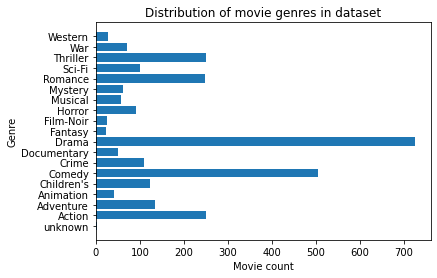

In [4]:
# Distribution of genres
genre_count = list()
for i in range(n_genres):
    genre_count.append(0)

for movie in data_movies:
    genre_score = movie[5:]
    genre_count = list(np.array(genre_count) + np.array(genre_score))

fig, ax = plt.subplots(1, 1)
ax.barh(genre_names, genre_count)
ax.set_title("Distribution of movie genres in dataset")
ax.set_xlabel('Movie count')
ax.set_ylabel('Genre')
plt.savefig("Data_Analysis_Plots/genre_distribution.jpg", dpi=200, bbox_inches="tight")



1682


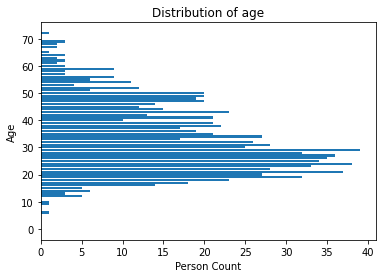

In [5]:
# Distribution of demo
# Age
age_count = list()
age_list = list()
# Get max age
max_age = 0
for i in data_demo:
    max_age = max(max_age, i[1])

for i in range(max_age):
    age_count.append(0)
    age_list.append(i)

for person in data_demo:
    age_count[person[1] - 1] += 1

fig, ax = plt.subplots(1, 1)
ax.barh(age_list, age_count)
ax.set_title("Distribution of age")
ax.set_xlabel('Person Count')
ax.set_ylabel('Age')
plt.savefig("Data_Analysis_Plots/age_distribution.jpg", dpi=200, bbox_inches="tight")

print(len(data_movies))



In [6]:
# Occupation, meh, later TODO



C:\Users\Quan Minh Pham\AppData\Local\Temp\ipykernel_17948\1344830573.py:25: RuntimeWarning: invalid value encountered in true_divide
  user_genre_prob = list(np.array(users_genre_like_count[i]) / np.array(users_genre_count[i]))


[1, 1, 0, 1, 0, 2, 2, 3, 4, 16, 0, 8, 0, 4, 0, 10, 0, 1, 0, 0, 0, 1, 1, 5, 7, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 0]


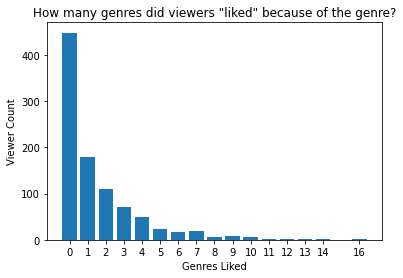

In [25]:
# Do users tend to only like specific genres, are from specific eras? Are there users who are generalists?
# For each user, we can get empirical mean the user will give certain rating for each genre.
# Lets say if the prob they gave a certain genre a 4-5 was +80% (Choice), we say they like that genre
# Lets also filter out genres that users have only watched less than 5 movies (heuristic chocie)
# Then for each user we can see how many genres they seem to like

genre_prob_thresh = 0.8 # How much % of movies of this genre must a user like for us to consider they "like" that genre?
rating_threshold = 4 # How high a rating a movie must get to consider that the user "like" that movie
genre_count_thresh = 5 # How much movies of this genre must user watch before we're confident they "like" that genre?

users_genre_like_count = [[0] * n_genres] * n_users # How movies of each genre did each user like?
users_genre_count = [[0] * n_genres] * n_users # How movies of each genre did each user watch?
users_like_count = [0] * n_users # How many genres does each user actually like?

for data in data_table:
    uid = data[0]
    umovie = data_movies[data[1] - 1]
    users_genre_count[uid - 1] = list(np.array(users_genre_count[uid - 1]) + np.array(umovie[5:]))

    # If rating was greater than threshold, consider that that's a movie user likes
    if data[2] >= rating_threshold:
        users_genre_like_count[uid - 1] = list(np.array(users_genre_like_count[uid - 1]) + np.array(umovie[5:]))

for i in range(len(users_genre_count)):
    user_genre_prob = list(np.array(users_genre_like_count[i]) / np.array(users_genre_count[i]))
    for j in range(len(user_genre_prob)):
        if user_genre_prob[j] > genre_prob_thresh and users_genre_count[i][j] >= genre_count_thresh:
            users_like_count[i] += 1

print(users_like_count[0:40])
labels, counts = np.unique(users_like_count, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title("How many genres did viewers \"liked\" because of the genre?")
plt.xlabel('Genres Liked')
plt.ylabel('Viewer Count')

plt.savefig("Data_Analysis_Plots/like_distribution.jpg", dpi=200, bbox_inches="tight")

In [15]:
# User with id 10
print(users_genre_count[10 - 1])

[0, 25, 14, 7, 8, 47, 16, 3, 81, 1, 9, 6, 14, 15, 36, 12, 34, 20, 5]


In [ ]:
# Do users with certain demographys like certain things? How can we ascertain this?
# We could plot, for each genre, see how many people are different age, maybe even occupation, liked it

# Plotting age liked by genre
genre_age_liked_count = [[0] * max_age] * n_genres

for i in range(n_genres):
    age_liked_list = [0] * max_age
    for data in data_table:
        uid = data[0]
        umovie = data_movies[data[1] - 1]
        uage = data_demo[uid - 1][1]
        urating = data[2]
        
        if urating > rating_threshold:
            genres_liked = np.where(np.array(umovie[5:]))